<a href="https://colab.research.google.com/github/Erandhi99/MLP-Classification/blob/main/204118E_ANN_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **Step 01: Load the Dataset**

In [4]:
# Load the dataset
from ucimlrepo import fetch_ucirepo

# Fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Metadata
print(chronic_kidney_disease.metadata)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [5]:
# Variable Information
print(chronic_kidney_disease.variables)

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [6]:
# Fetch features and target
features = chronic_kidney_disease.data.features
target = chronic_kidney_disease.data.targets

# Convert data to pandas DataFrame
features_df = pd.DataFrame(features)
features_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [7]:
# Check features data types
features.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [8]:
# Check and reshape target variable
print(f"Original target shape: {target.shape}")

Original target shape: (400, 1)


In [9]:
# Reshape target variable
target = target.squeeze()
target = pd.Series(target)
target.shape

(400,)

# **Step 2: Preprocess the Data**

In [10]:
# Change features' categorical data type
features = features.astype({
    'sg': 'category',
    'al': 'category',
    'su': 'category',
})
features.dtypes

,0
age,float64
bp,float64
sg,category
al,category
su,category
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [11]:
# Identify categorical and continuous columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n Categorical Columns: ", categorical_cols)
print("\n Continuous Columns: ", continuous_cols)


 Categorical Columns:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

 Continuous Columns:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


In [12]:
# Handle missing values
imputer_categorical = SimpleImputer(strategy='most_frequent')  # Use mode for categorical features
imputer_continuous = SimpleImputer(strategy='mean')  # Use mean for continuous features

features.loc[:, categorical_cols] = imputer_categorical.fit_transform(features[categorical_cols])
features.loc[:, continuous_cols] = imputer_continuous.fit_transform(features[continuous_cols])
features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,15.7,47.0,6700.0,4.900000,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,16.5,54.0,7800.0,6.200000,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,15.8,49.0,6600.0,5.400000,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,14.2,51.0,7200.0,5.900000,no,no,no,good,no,no


In [13]:
# Handle outliers in continuous features using Isolation Forest
isolation_forest = IsolationForest(random_state=42)
outliers = isolation_forest.fit_predict(features[continuous_cols])
features = features[outliers == 1]
target = target[outliers == 1]
features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,15.7,47.0,6700.0,4.900000,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,16.5,54.0,7800.0,6.200000,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,15.8,49.0,6600.0,5.400000,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,14.2,51.0,7200.0,5.900000,no,no,no,good,no,no


In [14]:
# Identify all object-type(Binary) columns
object_columns = features.select_dtypes(include='object').columns

# Iterate over each object-type column and print its unique values
for col in object_columns:
    print(f"Unique values in column '{col}':")
    print(features[col].unique())
    print("-" * 40)

Unique values in column 'rbc':
['normal' 'abnormal']
----------------------------------------
Unique values in column 'pc':
['normal' 'abnormal']
----------------------------------------
Unique values in column 'pcc':
['notpresent' 'present']
----------------------------------------
Unique values in column 'ba':
['notpresent' 'present']
----------------------------------------
Unique values in column 'htn':
['yes' 'no']
----------------------------------------
Unique values in column 'dm':
['yes' 'no' '\tno']
----------------------------------------
Unique values in column 'cad':
['no' 'yes']
----------------------------------------
Unique values in column 'appet':
['good' 'poor']
----------------------------------------
Unique values in column 'pe':
['no' 'yes']
----------------------------------------
Unique values in column 'ane':
['no' 'yes']
----------------------------------------


In [15]:
# Handle outliers in binary features
features.loc[:, 'dm'] = features.loc[:, 'dm'].replace('\tno', 'no')
print(features.dm.unique())

['yes' 'no']


In [16]:
# Encoding Binary Values
binary_features = features[object_columns].copy()
label_encoder = LabelEncoder()

for col in object_columns:
    binary_features[col] = label_encoder.fit_transform(binary_features[col])

binary_features

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [17]:
# Encoding categorical values
category_cols = features.select_dtypes(include='category').columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = encoder.fit_transform(features[category_cols])
categorical_features = pd.DataFrame(categorical_features, columns=encoder.get_feature_names_out(category_cols))
categorical_features

,sg_1.005,sg_1.01,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
374,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Scaling continuous values
scaler = MinMaxScaler()
continuous_features = scaler.fit_transform(features[continuous_cols])
continuous_features = pd.DataFrame(continuous_features, columns=continuous_cols)
continuous_features

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,0.522727,0.230769,0.211538,0.160093,0.016771,0.728886,0.518840,0.815385,0.750,0.231405,0.500000
1,0.056818,0.000000,0.269309,0.076566,0.008386,0.728886,0.518840,0.500000,0.600,0.157025,0.412042
2,0.681818,0.230769,0.856838,0.238979,0.029350,0.728886,0.518840,0.369231,0.425,0.219008,0.412042
3,0.522727,0.153846,0.202991,0.252900,0.071279,0.152174,0.000000,0.492308,0.450,0.185950,0.267857
4,0.556818,0.230769,0.179487,0.113689,0.020964,0.728886,0.518840,0.523077,0.525,0.210744,0.392857
...,...,...,...,...,...,...,...,...,...,...,...
373,0.602273,0.230769,0.252137,0.220418,0.002096,1.000000,0.585366,0.838462,0.825,0.185950,0.446429
374,0.454545,0.153846,0.113248,0.136891,0.016771,0.804348,0.243902,0.900000,1.000,0.231405,0.678571
375,0.113636,0.230769,0.166667,0.113689,0.004193,0.717391,0.463415,0.846154,0.875,0.181818,0.535714
376,0.170455,0.076923,0.196581,0.225058,0.012579,0.673913,0.585366,0.723077,0.925,0.206612,0.625000


In [19]:
# Combine processed features
processed_features = np.hstack([binary_features, categorical_features, continuous_features])
processed_features = pd.DataFrame(processed_features)
processed_features

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.230769,0.211538,0.160093,0.016771,0.728886,0.518840,0.815385,0.750,0.231405,0.500000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.269309,0.076566,0.008386,0.728886,0.518840,0.500000,0.600,0.157025,0.412042
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.230769,0.856838,0.238979,0.029350,0.728886,0.518840,0.369231,0.425,0.219008,0.412042
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.153846,0.202991,0.252900,0.071279,0.152174,0.000000,0.492308,0.450,0.185950,0.267857
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.179487,0.113689,0.020964,0.728886,0.518840,0.523077,0.525,0.210744,0.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.252137,0.220418,0.002096,1.000000,0.585366,0.838462,0.825,0.185950,0.446429
374,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153846,0.113248,0.136891,0.016771,0.804348,0.243902,0.900000,1.000,0.231405,0.678571
375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.166667,0.113689,0.004193,0.717391,0.463415,0.846154,0.875,0.181818,0.535714
376,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.196581,0.225058,0.012579,0.673913,0.585366,0.723077,0.925,0.206612,0.625000


In [20]:
# Check outliers in target
print(target.unique())

['ckd' 'ckd\t' 'notckd']


In [21]:
# Handle outliers in target
target = target.replace('ckd\t', 'ckd')
print(target.unique())

['ckd' 'notckd']


In [22]:
# Encode the target variable
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(target)
encoded_target = pd.Series(encoded_target)
encoded_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
373,1
374,1
375,1
376,1


In [23]:
# Verify preprocessing
print("Processed features shape:", processed_features.shape)
print("Encoded target shape:", encoded_target.shape)

Processed features shape: (378, 37)
Encoded target shape: (378,)


# **Step 3: Split the Data into Training and Testing Sets**

In [24]:
# Split the data
features_train, features_test, target_train, target_test = train_test_split(processed_features, encoded_target, test_size=0.3, random_state=42)
features_test

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
287,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.228632,0.109049,0.016771,0.760870,0.609756,0.953846,0.650000,0.243802,0.625000
329,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.130342,0.220418,0.010482,0.760870,0.195122,0.976923,0.650000,0.318182,0.410714
323,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.160256,0.076566,0.016771,0.739130,0.439024,0.669231,0.700000,0.235537,0.714286
145,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.076923,0.858974,0.215777,0.023061,0.608696,0.365854,0.469231,0.425000,0.256451,0.412042
55,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.384615,0.269309,0.438515,0.125786,0.728886,0.518840,0.138462,0.622112,0.256451,0.412042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.132479,0.665893,0.140461,0.673913,0.682927,0.594341,0.622112,0.256451,0.412042
224,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.307692,0.314103,0.215777,0.041929,0.739130,0.097561,0.661538,0.825000,0.363636,0.660714
233,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.211538,0.118329,0.016771,0.869565,0.341463,0.676923,0.950000,0.289256,0.696429
165,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.452991,0.252900,0.031447,0.728886,0.518840,0.423077,0.350000,0.256451,0.412042


# **Step 4: Build & Train the MLP Model**

In [25]:
# Build the model
mlp = MLPClassifier(hidden_layer_sizes=(12,), max_iter=1000, random_state=42)

# Train the model
mlp.fit(features_train, target_train)

MLPClassifier(hidden_layer_sizes=(12,), max_iter=1000, random_state=42)

# **Step 5: Predict and Calculate Accuracy**

In [29]:
# Prediction
target_pred_test = mlp.predict(features_test)

In [31]:
# Calculate accuracy for training and test sets
accuracy_test = accuracy_score(target_test, target_pred_test)

print(f"Testing Accuracy: {accuracy_test:.2f}")

Testing Accuracy: 0.98


# **Step 6: Confusion Matrix**

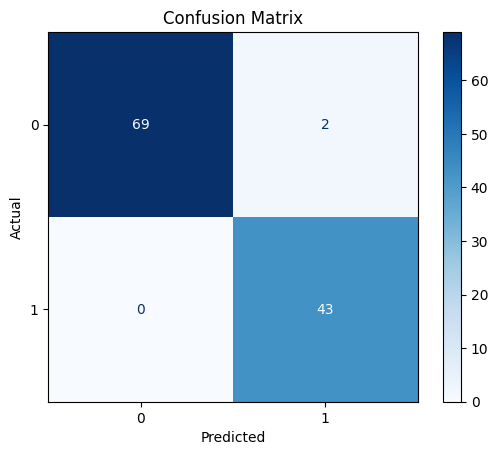

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [32]:
# Plot confusion matrix
cm = confusion_matrix(target_test, target_pred_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(target_test, target_pred_test))